In [48]:
from PyPDF2 import PdfReader
import re

import nltk
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

In [2]:
def extract_text(pdf_docs):
    text=""
    for pdf in pdf_docs:
        pdf_reader = PdfReader(pdf)
        for page in pdf_reader.pages:
            text+=page.extract_text()
    return text

In [3]:
# pdf_docs = [r'data\ramayan_summary.pdf', r'data\mahabharat_summary.pdf']
pdf_docs = [r'data\ramayan_summary.pdf']


In [4]:
raw_text = extract_text(pdf_docs=pdf_docs)

In [5]:
raw_text

'Ramayana Short Summary  \n  \n Dasharatha is the King of Ayodhya and has three wives and four sons, Rama,  \n Lakshmana, Bharata and Shatrughana. Rama is the ideal and perfect son, and grows  \n up with his brothers. When he comes of age, he marries Sita, the princess of a nearby  \n kingdom. However, Bharata\'s mother is Kaikeyi, who resents Rama being the crown  \n prince. She calls up a debt that Dasharatha owes her and asks for Rama to be exiled  \n for fourteen years and her son Bharata be made crown prince instead.  \n The devastated Dasharatha has no choice and Rama prepares to leave for exile. Sita  \n and Lakshmana will not leave his side however and follow him into the forest. While in  \n the forest, Surphanaka, a female rakshasi (demoness) becomes enamored of Rama  \n and is wounded by Lakshmana while trying to kill Sita. She flees to her brother Khara  \n and asks him to avenge her. However, Khara and his army are defeated by Rama and  \n Lakshmana, and only one member of

In [6]:
def clean_text(text):
    # Remove unwanted characters
    clean_text = re.sub(r'\n', ' ', text)
    
    # Remove apostrophes
    clean_text = re.sub(r"'", '', clean_text)
    
    # Normalize whitespace
    clean_text = re.sub(r'\s+', ' ', clean_text)
    
    return clean_text

In [7]:
text = clean_text(raw_text)

In [8]:
text

'Ramayana Short Summary Dasharatha is the King of Ayodhya and has three wives and four sons, Rama, Lakshmana, Bharata and Shatrughana. Rama is the ideal and perfect son, and grows up with his brothers. When he comes of age, he marries Sita, the princess of a nearby kingdom. However, Bharatas mother is Kaikeyi, who resents Rama being the crown prince. She calls up a debt that Dasharatha owes her and asks for Rama to be exiled for fourteen years and her son Bharata be made crown prince instead. The devastated Dasharatha has no choice and Rama prepares to leave for exile. Sita and Lakshmana will not leave his side however and follow him into the forest. While in the forest, Surphanaka, a female rakshasi (demoness) becomes enamored of Rama and is wounded by Lakshmana while trying to kill Sita. She flees to her brother Khara and asks him to avenge her. However, Khara and his army are defeated by Rama and Lakshmana, and only one member of their entire army survives. This lone soldier flees t

In [9]:
def get_most_frequent_words(text, num_words=30, common_words=None):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    if common_words is not None:
        stop_words.update(common_words)
        
    all_words = ''.join(text).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    word_freq = Counter(filtered_words)
    most_common_words = word_freq.most_common(num_words)
    return most_common_words

In [10]:
most_freq_words = get_most_frequent_words(text=text)

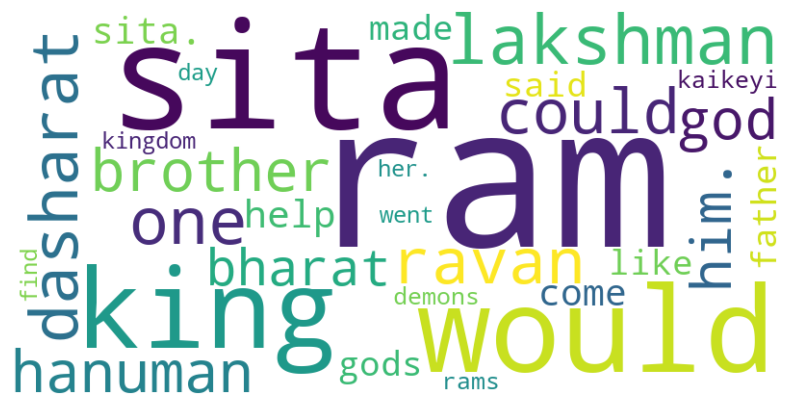

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_freq_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
def chunking(text):
    text_splitter = CharacterTextSplitter(separator='\n',chunk_size=1200,chunk_overlap=400,length_function=len)
    chunks = text_splitter.split_text(text)
    return chunks

In [30]:
chunks = chunking(raw_text)

In [38]:
print(chunks[0], chunks[1], sep='\n'+'-'*100+'\n')

Ramayana Short Summary  
  
 Dasharatha is the King of Ayodhya and has three wives and four sons, Rama,  
 Lakshmana, Bharata and Shatrughana. Rama is the ideal and perfect son, and grows  
 up with his brothers. When he comes of age, he marries Sita, the princess of a nearby  
 kingdom. However, Bharata's mother is Kaikeyi, who resents Rama being the crown  
 prince. She calls up a debt that Dasharatha owes her and asks for Rama to be exiled  
 for fourteen years and her son Bharata be made crown prince instead.  
 The devastated Dasharatha has no choice and Rama prepares to leave for exile. Sita  
 and Lakshmana will not leave his side however and follow him into the forest. While in  
 the forest, Surphanaka, a female rakshasi (demoness) becomes enamored of Rama  
 and is wounded by Lakshmana while trying to kill Sita. She flees to her brother Khara  
 and asks him to avenge her. However, Khara and his army are defeated by Rama and  
 Lakshmana, and only one member of their entire a

In [49]:
def embeddings(chunks):
    embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
    faiss = FAISS.from_texts(chunks, embedding_model)
    return faiss

In [50]:
vector_store = embeddings(chunks)